# Executive Summary

## About the Data
Data source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## In this notebook:
1. Data Preparation
2. Exploratory Data Analysis (EDA)
3. Feature Engineering

In [ ]:
#@title Library Import

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#@title Load Dataset
#link:https://drive.google.com/file/d/1empaWFjl706Y2BbYzxMpAQLmIBZiPQC3/view?usp=sharing

# ID File
file_id = '1empaWFjl706Y2BbYzxMpAQLmIBZiPQC3'

# URL untuk mengakses file secara langsung dari Google Drive
url = f'https://drive.google.com/uc?id={file_id}'

# Baca dataset
df = pd.read_csv(url)

# Menampilkan beberapa baris pertama dari dataset
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


##1. Data Preparation

In [ ]:
#@title Lihat sample data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#@title Lihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#@title Lihat shape dataframe
df.shape

(1025, 14)

In [ ]:
#@title Lihat kolom

print("List of columns:")
print(df.columns)

List of columns:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Dari beberapa kode di atas, dapat diketahui bahwa dataframe terdiri atas 1025 rows dan 14 columns, yang mana columns tersebut terdiri atas: 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'

In [ ]:
#@title Lihat missing value
print('Jumlah missing values:')
for col in df.columns:
    jml_missing_value = sum(df[col].isna())
    print('{}:{}'.format(col,jml_missing_value))

Jumlah missing values:
age:0
sex:0
cp:0
trestbps:0
chol:0
fbs:0
restecg:0
thalach:0
exang:0
oldpeak:0
slope:0
ca:0
thal:0
target:0


Bisa disimpulkan bahwa dataframe tidak memiliki missing value. Apabila terdapat missing value bisa dilakukan handling missing data berupa:
*   Mean/Median/Mode Imputation: Mengisi missing value dengan nilai rerata/nilai tengah/modus
*   Forward Fill / Backward Fill: Mengisi nilai yang hilang dengan nilai terakhir yang diketahui atau nilai yang berada di depan nilai yang hilang
*   Interpolation: Metode mengisi nilai yang hilang dengan mengestimasikan nilai berdasarkan nilai titik data lainnya

handling missing values/data juga bisa dilakukan dengan dropping value. Penghapusan kolom juga bisa dilakukan jika kolom tidak memiliki korelasi yang besar terhadap data target, ataupun pada saat jumlah missing value yang terlalu banyak.



In [ ]:
#@title Cek Duplicate values
df.duplicated().sum()

723

Ditemukan 723 data merupakan nilai yang terduplikat, oleh karena itu harus dilakukan handling berupa penghapusan data duplicate

In [ ]:
df_no_duplicate = df.drop_duplicates()
df_no_duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
df_no_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


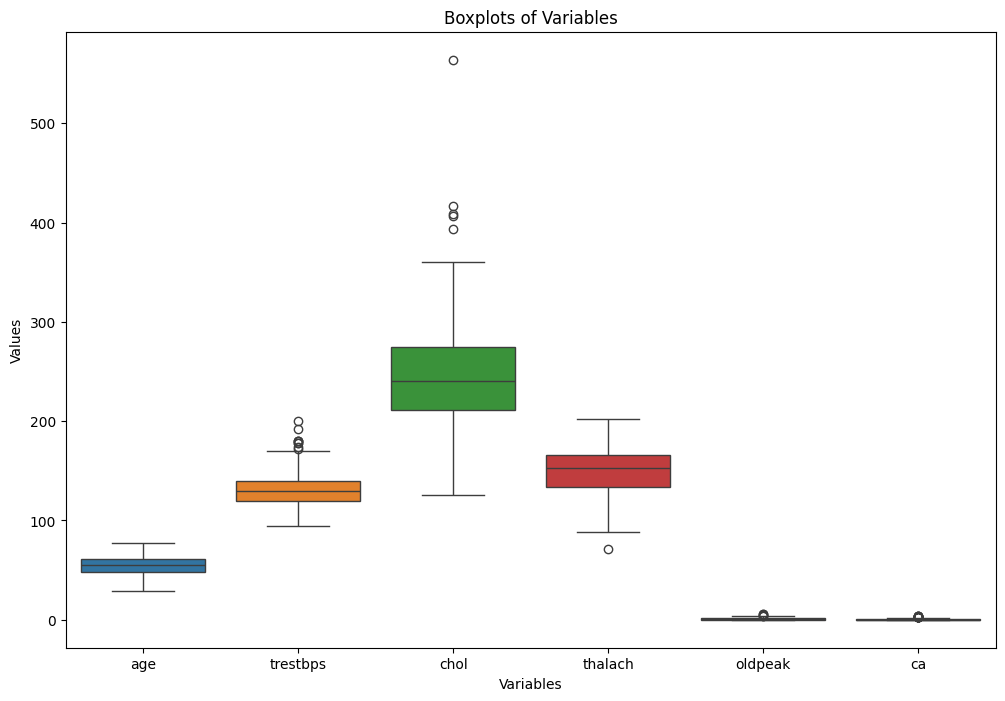

In [ ]:
#@title Cek Outlier
# Set the figure size
plt.figure(figsize=(12, 8))

# Membuat boxplot dengan seaborn
sns.boxplot(data=df_no_duplicate[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca' ]])

# Judul dan label
plt.title('Boxplots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

# Munculkan boxplot
plt.show()

Ditemukan outliers dari dataframe. Apabila terdapat outlier, maka kita harus melakukan handling outliers. Beberapa cara yang bisa dilakukan:
*   Penghapusan: berfungsi dengan baik untuk kumpulan data besar. Namun jika terdapat banyak outlier atau jika kumpulan data tidak terlalu besar, hal ini akan mengurangi jumlah titik data, yang pada gilirannya dapat memengaruhi hasil dan keakuratan model.
*   Imputasi: untuk kumpulan data yang relatif kecil. Di sini, outlier diperlakukan sebagai nilai yang hilang dan diperlakukan sebagaimana kita memperlakukan nilai yang hilang, yaitu memasukkan mean atau median bergantung pada jenis datanya. Namun metode ini tidak terlalu umum, karena dapat mengubah distribusi data.

Karena dataset ini tergolong kecil, maka dilakukan imputasi dengan nilai median. Nilai median dipilih karena nilai rata-rata dipengaruhi oleh outliers, sedangkan median tidak.

In [ ]:
#@title Handling Outliers
#membuat df baru dimana tidak ada duplikat dan outliers
df_no_duplicate_outliers = df_no_duplicate
for col in df_no_duplicate_outliers.columns:
    q1 = df_no_duplicate_outliers[col].quantile(0.25)
    q3 = df_no_duplicate_outliers[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_no_duplicate_outliers.loc[(df_no_duplicate_outliers[col] < lower_bound) | (df_no_duplicate_outliers[col] > upper_bound), col] = df_no_duplicate_outliers[col].median()

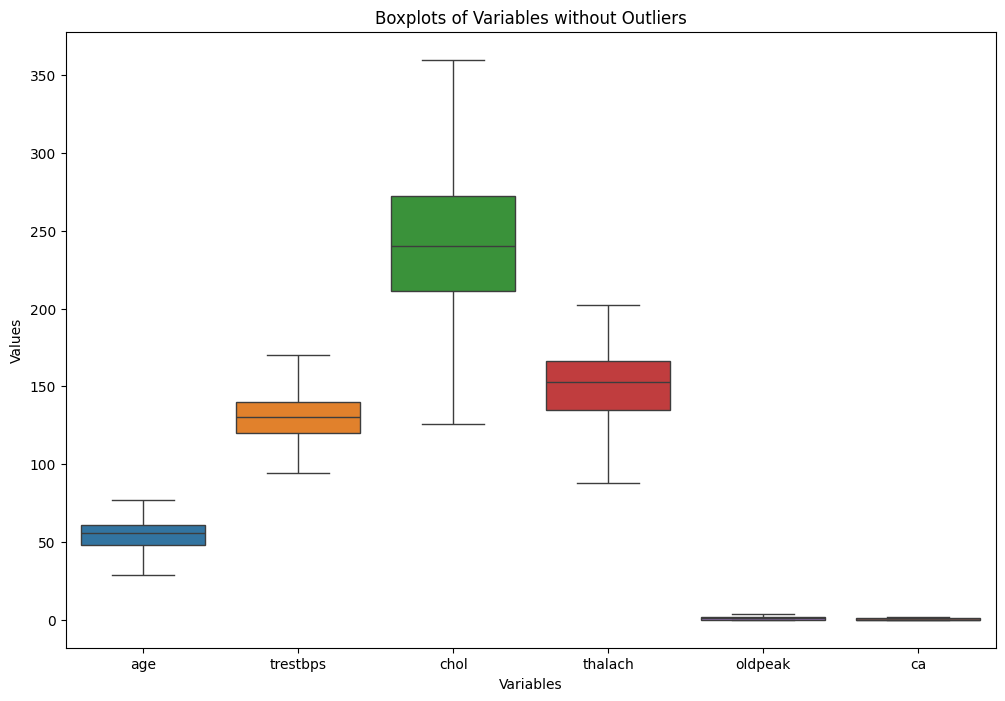

In [ ]:
#@title Cek Outlier kembali
# Set the figure size
plt.figure(figsize=(12, 8))

# Create boxplots using Seaborn
sns.boxplot(data=df_no_duplicate_outliers[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca' ]])

# Add title and labels
plt.title('Boxplots of Variables without Outliers')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

Kini

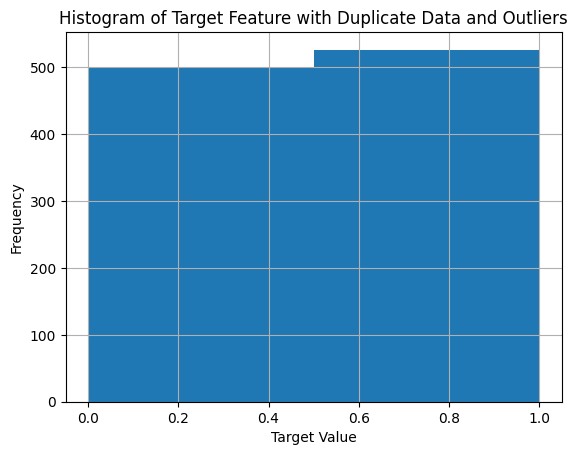

In [ ]:
#@title Cek imbalance data

df['target'].hist(bins=2)
plt.title('Histogram of Target Feature with Duplicate Data and Outliers')  # Judul histogram
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

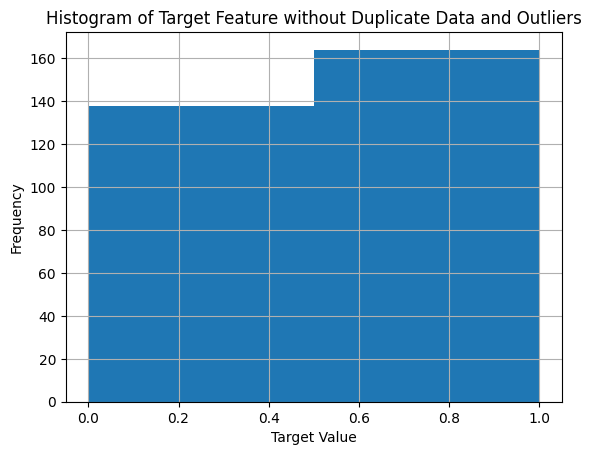

In [ ]:
#@title Cek imbalance data

df_no_duplicate_outliers['target'].hist(bins=2)
plt.title('Histogram of Target Feature without Duplicate Data and Outliers')  # Judul histogram
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

Dari kedua histogram di atas, disimpulkan bahwa penghapusan data duplikat tidak berpengaruh besar pada keseimbangan data.

Imbalance data dilihat dari data targetnya saja.

### Feature Encoding
Feature encoding adalah proses mengubah data categorical menjadi representasi numerik agar bisa digunakan dalam Machine Learning.
Terdapat 2 teknik handling categorical data:


*   One-hot encoding: Digunakan pada data nominal atau yang tidak memiliki urutan. Cara encodingnya adalah mengubah categorical data menjadi sebuah vektor biner dengan nilai 1 pada kategori yang sesuai dan 0 untuk kategori lainnya.
*   Label Encoding: Digunakan untuk melabeli setiap data categorical menjadi angka numerik seperti 1,2,3, dan seterusnya



##2. Exploratory Data Analysis (EDA)

###Elaborasi features dan tipe data (nominal, ordinal, numerical)

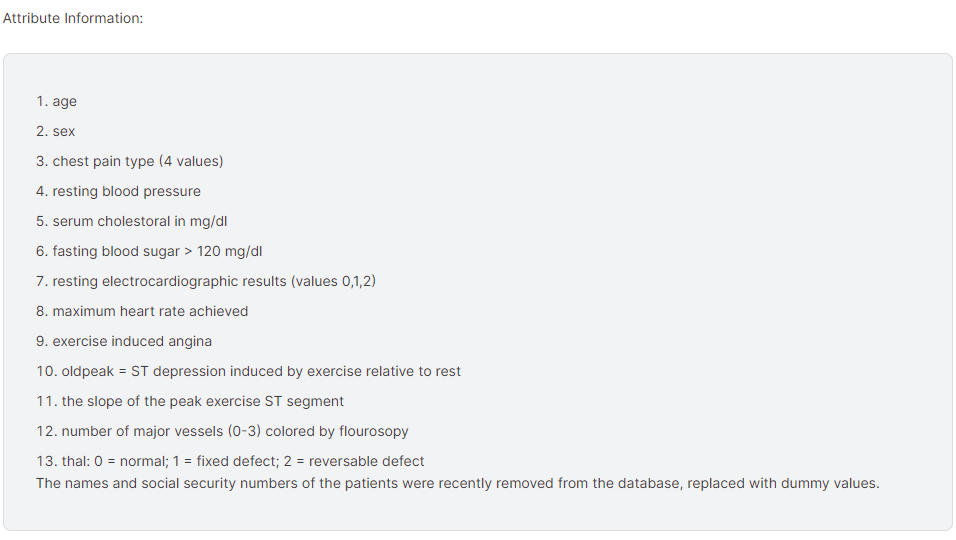

In [ ]:
df_no_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.4 KB


Dari informasi di atas, diketahui bahwa pada dataset terdapat 13 features dan 1 label/kelas.


*   age -->
Feature ini berisikan umur dari pasien, tipe datanya ialah float64 (numerical)
*   sex -->
Feature ini memberikan info mengenai jenis kelamin dari pasien. Tipe datanya sebenarnya ialah nominal (Male dan Female) akan tetapi dilakukan encoding menjadi terhadap data. Kini tipe data feature sex ialah int64(numerical), yang mana 1 = male dan  0 = female
*   cp --> cp merupakan Chest Pain Type (4 values). Ini menunjukkan jenis nyeri dada yang dirasakan oleh pasien, yang memiliki 4 nilai kategori yang mungkin. Tetapi sudah dilakukan encoding terhadap data, hingga kini dataset bertipe int64.
*   trestbps --> resting blood pressure (in mm Hg on admission to the hospital). Feature ini menunjukkan tekanan darah istirahat pasien, yang diukur dalam mmHg (milimeter air raksa). Feature ini bertipe data numerik, tepatnya int64.
* chol --> serum cholestoral in mg/dl. Ini adalah kadar kolesterol serum pasien dalam mg/dl (miligram per desiliter). Feature ini bertipe data numerikal.
* fbs --> (fasting blood sugar>120 mg/dl) (1 = true; 0 = false). Ini menunjukkan kadar gula darah puasa pasien. Tipe datanya ialah categorical dengan nilai 1 jika gula darah puasa >120 mg/dl dan nilai 0 jika tidak. Pada dataset, feature ini sudah di encoding dengan label 1 bernilai true dan 0 bernilai false (nominal).
* restecg --> resting electrocardiographic results. Ini adalah hasil elektrokardiogram istirahat pasien,  dengan nilai 0,1, dan 2. Feature ini bertipe data ordinal (categorical).
* thalach --> maximum heart rate achieved. Ini adalah detak jantung maksimum yang dicapai oleh pasien selama tes. Feature ini bertipe data numerik.
* exang --> exercise induced angina (1 = yes; 0 = no). Ini menunjukkan apakah pasien mengalami angina yang diinduksi oleh latihan, dengan angka 1 bernilai true, angka 0 bernilai false. Feature bertipe data nominal.
* oldpeak --> ST depression induced by exercise relative to rest. Ini adalah depresi ST yang diinduksi oleh latihan relatif terhadap istirahat. Feature ini bertipe numerik.
*  slope --> the slope of the peak exercise ST segment. Ini adalah kemiringan segmen ST latihan puncak. Feature ini bernilai 0, 1, dan 2 (ordinal).
* ca --> number of major vessels (0-3) colored by flourosopy. Ini adalah jumlah pembuluh darah besar yang berwarna oleh flourosopi. Feature ini memiliki nilai 0, 1, 2, dan 3 (ordinal).
* thal --> 1 = normal; 2 = fixed defect; 3 = reversable defect. Ini adalah jenis defect thalassemia, dengan nilai 1 untuk normal, 2 untuk fixed defect dan 3 untuk reversable defect (nominal)
* target --> 1 or 0. Ini merupakan label atau target variabel yang menunjukkan kemungkinan individu mengidap penyakit jantung, 1 menunjukkan true dan 0 bernilai false.








###Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus



1.   Mean --> adalah nilai rata-rata dari sekumpulan data. Mean sangat sensitif dengan pencilan (outliers) atau nilai ekstrem dalam data. Mean sering digunakan dalam data yang berdistribusi normal atau mendekati normal.


2.   Median --> Median adalah nilai tengah dari data yang telah diurutkan. Median kurang sensitif terhadap outliers dibandingkan mean dan lebih baik dalam merepresentasikan pusat distribusi data jika terdapat outlier. Median digunakan dalam data yang memiliki outlier atau terdistribusi tidak simetris.

3. Modus --> Modus adalah nilai yang paling sering muncul dalam data. Jika ada beberapa nilai yang muncul dengan frekuensi yang sama, maka dataset tersebut dikatakan memiliki multiple modus. Modus sering digunakan dalam data kategorik.


Saat memilih metode untuk menganalisis atau merepresentasikan data, contohnya pada saat handling missing value dan ouliers, penting untuk mempertimbangkan karakteristik data tersebut, seperti distribusi, kehadiran outlier, dan jenis data.


In [ ]:
#@title Mencari Nilai Mean
thalach_mean = df_no_duplicate_outliers['thalach'].mean()
print("Rerata dari nilai maximum heart rate achieved ialah: ", thalach_mean)

Rerata dari nilai maximum heart rate achieved ialah:  149.83940397350995


In [ ]:
#@title Mencari Nilai Median
thalach_median = df_no_duplicate_outliers['thalach'].median()
print("Median dari nilai maximum heart rate achieved ialah: ", thalach_median)

Median dari nilai maximum heart rate achieved ialah:  152.75


In [ ]:
#@title Mencari Nilai Mode
modus = df_no_duplicate_outliers['thalach'].value_counts()
print('5 nilai paling banyak muncul pada feature Thalach:\n', modus.head(5))
thalach_mode = df_no_duplicate_outliers['thalach'].mode()
print("Diketahui modus dari nilai maximum heart rate achieved ialah: ", thalach_mode)

5 nilai paling banyak muncul pada feature Thalach:
 162.0    11
163.0     9
160.0     9
152.0     8
144.0     7
Name: thalach, dtype: int64
Diketahui modus dari nilai maximum heart rate achieved ialah:  0    162.0
Name: thalach, dtype: float64


Text(0, 0.5, 'Number of Patients')

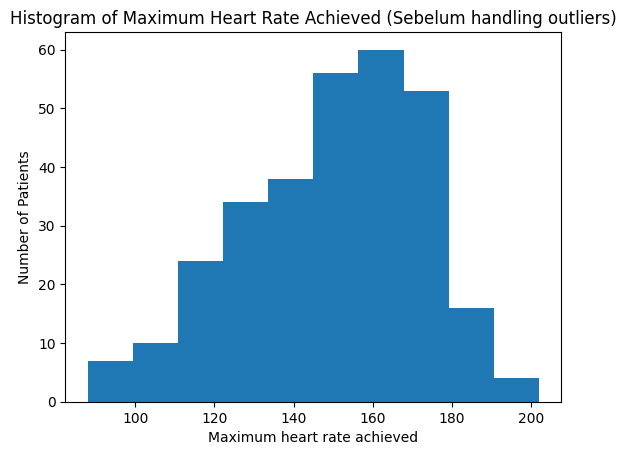

In [ ]:
df_no_duplicate.thalach.plot.hist()
plt.title('Histogram of Maximum Heart Rate Achieved (Sebelum handling outliers)')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Number of Patients')

Bisa kita lihat, distribusi data di atas berbentuk Left-Skewed histogram (condong ke kiri), sehingga handling outlier pada feature sebaiknya menggunakan median daripada mean.

###Menemukan dan mendeskripsikan statistical five summaries

Five summaries berguna dalam analisis deskriptif atau pada saat penyelidikan awal dataset. Five summaries terdiri atas nilai minimum, nilai kuartil bawah (Q1), median (Q2), kuartil atas(Q3), serta nilai maksimum.

Nilai-nilai ini dipilih untuk memberikan ringkasan kumpulan data karena setiap nilai menggambarkan bagian tertentu dari kumpulan data: median mengidentifikasi pusat kumpulan data; kuartil atas dan bawah mencakup separuh tengah kumpulan data; dan observasi tertinggi dan terendah memberikan informasi tambahan tentang sebaran data sebenarnya. Hal ini menjadikan 5 summaries sebagai ukuran penyebaran yang berguna.

Untuk melihat 5 summaries bisa digunakan code


```
df.describe
```



In [ ]:
#@title Statistical Summaries
df_no_duplicate_outliers.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.0,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,130.066225,243.226821,0.0,0.526490,149.839404,0.327815,0.974834,1.397351,0.466887,2.327815,0.543046
std,9.04797,0.466426,1.032044,15.148509,44.622846,0.0,0.526027,22.450348,0.470196,1.041288,0.616274,0.708676,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.0,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.250000,0.0,1.000000,152.750000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,272.500000,0.0,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


Bisa dilihat feature 'age' memiliki 5 summaries:
* nilai minimum : 29
* Q1: 48
* median : 55.5
* Q3 : 61
* nilai maksimum : 77



###Mendeskripsikan distribusi data

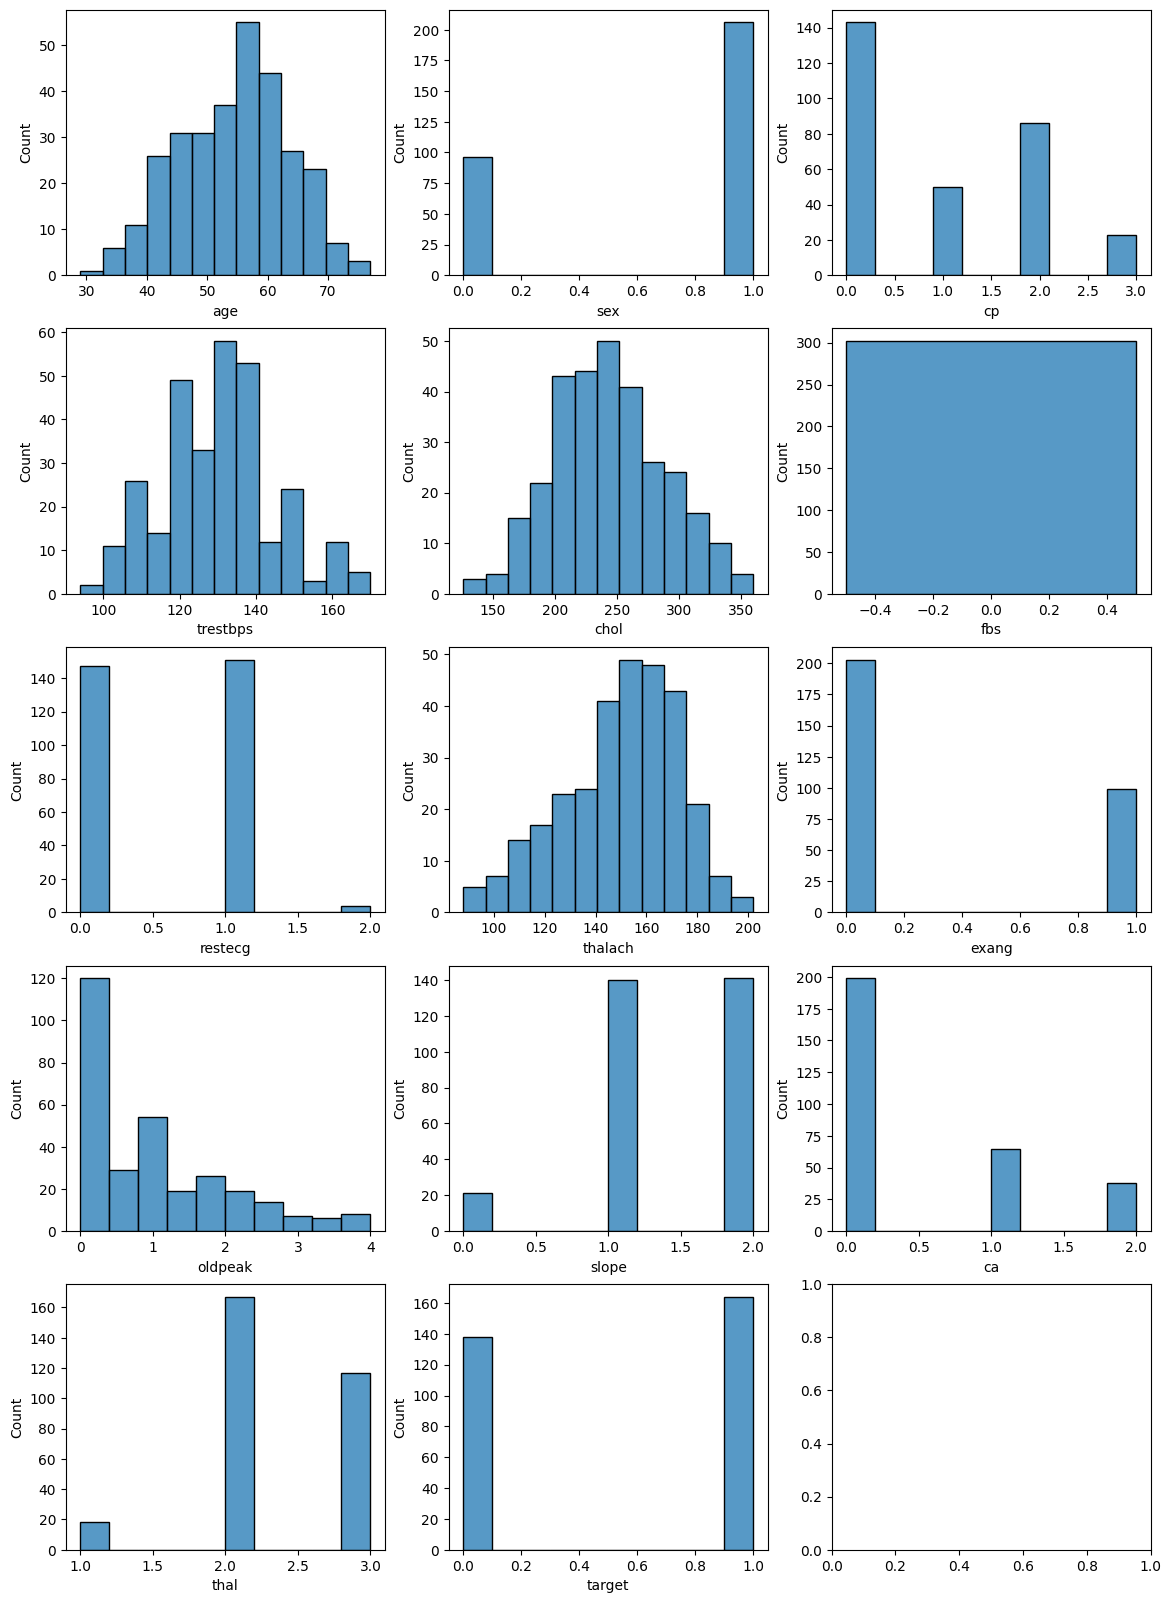

In [ ]:
fig, axs = plt.subplots(5,3, figsize = (14,20))
for col, ax in zip(df_no_duplicate_outliers.columns, axs.flatten()):
  sns.histplot(data = df_no_duplicate_outliers, x = col, ax = ax)

Terdapat 3 jenis distribusi data:

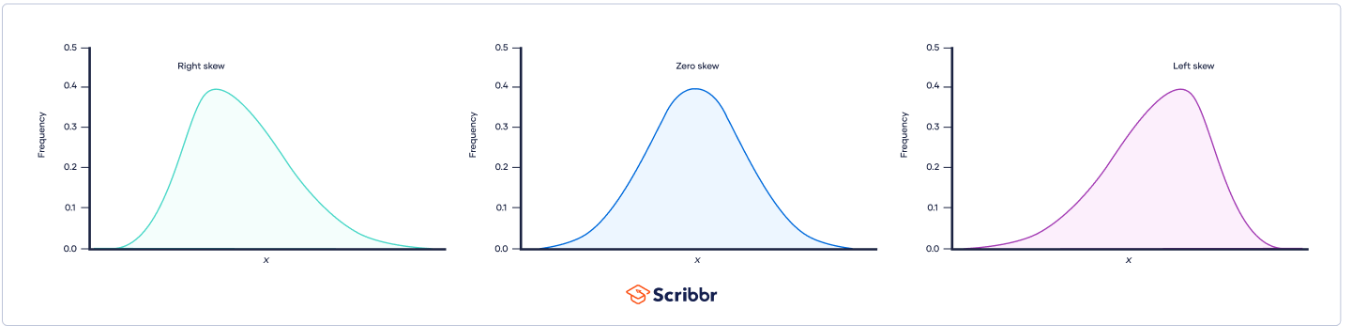



1.   Right Skewed / Positive Skewed

      Right skewed merupakan distribusi yang rata-rata distribusinya hampir selalu lebih besar daripada median. Hal ini dikarenakan nlai ekstrem lebih memengaruhi mean dibandingkan median.

      contoh right skewed terdapat pada distribusi feature: oldpeak, ca, cp


2.   Zero Skewed / Normal Skewed / Symmetric

      Normal skewness atau kemiringan nol yaitu jika suatu distribusi tidak mempunyai kemiringan, maka distribusi tersebut simetris. Sisi kiri dan kanannya adalah bayangan cermin.

      contoh normal skewed terdapat pada distribusi feature: age, chol


3.   Left Skewed / Negative Skewed

      Left skewed merupakan distribusi yang lebih condong ke kiri pada sisi puncaknya, dibandingkan pada sisi kanan. Dengan kata lain, distribusi yang condong ke kiri memiliki ekor panjang di sisi kirinya. Rata-rata dari distribusi condong ke kiri hampir selalu lebih kecil dari mediannya.

      contoh left skewed terdapat pada distribusi feature: sex, slope

##3. Feature Engineering:

membuat 10 feature baru dari dataset heart disease, feature baru ini ditujukan agar bisa membantu membuat langkah preventif untuk mengurangi dampak dari heart disease.

In [ ]:
#@title Tekanan Darah Relatif: Dapat dihitung sebagai perbandingan tekanan darah istirahat terhadap tekanan darah maksimum yang dicapai selama tes

df_no_duplicate_outliers['tekanan_darah_relatif'] = df_no_duplicate_outliers['trestbps'] / df_no_duplicate_outliers['thalach']
df_no_duplicate_outliers['tekanan_darah_relatif']

<ipython-input-171-6da585a1635d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicate_outliers['tekanan_darah_relatif'] = df_no_duplicate_outliers['trestbps'] / df_no_duplicate_outliers['thalach']


0      0.744048
1      0.903226
2      1.160000
3      0.919255
4      1.301887
         ...   
723    1.043478
733    0.617143
739    0.795031
843    1.280000
878    1.061947
Name: tekanan_darah_relatif, Length: 302, dtype: float64

In [ ]:
#@title Rasio Kolesterol terhadap Tekanan Darah: memberikan gambaran tentang risiko penyakit jantung.
# Rasio Kolesterol terhadap Tekanan Darah = kolesterol total/tekanan darah istirahat

df_no_duplicate_outliers.loc[:, 'ratio_chol_thdp_trestbps'] = df_no_duplicate_outliers['chol'] / df_no_duplicate_outliers['trestbps']
df_no_duplicate_outliers

<ipython-input-172-d0bf2730a094>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicate_outliers.loc[:, 'ratio_chol_thdp_trestbps'] = df_no_duplicate_outliers['chol'] / df_no_duplicate_outliers['trestbps']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,tekanan_darah_relatif,ratio_chol_thdp_trestbps
0,52.0,1,0,125,212.0,0,1,168.0,0,1.0,2,2,3,0,0.744048,1.696000
1,53.0,1,0,140,203.0,0,0,155.0,1,3.1,0,0,3,0,0.903226,1.450000
2,70.0,1,0,145,174.0,0,1,125.0,1,2.6,0,0,3,0,1.160000,1.200000
3,61.0,1,0,148,203.0,0,1,161.0,0,0.0,2,1,3,0,0.919255,1.371622
4,62.0,0,0,138,294.0,0,1,106.0,0,1.9,1,0,2,0,1.301887,2.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.0,0,2,120,211.0,0,0,115.0,0,1.5,1,0,2,1,1.043478,1.758333
733,44.0,0,2,108,141.0,0,1,175.0,0,0.6,1,0,2,1,0.617143,1.305556
739,52.0,1,0,128,255.0,0,1,161.0,1,0.0,2,1,3,0,0.795031,1.992188
843,59.0,1,3,160,273.0,0,0,125.0,0,0.0,2,0,2,0,1.280000,1.706250


In [ ]:
#@title Rata-rata denyut jantung maksimum terhadap usia: dapat memberikan indikasi tentang kebugaran jantung seseorang.

df_no_duplicate_outliers.loc[:, 'denyut_jantung_age_mean'] = df_no_duplicate_outliers['thalach'] / df_no_duplicate_outliers['age']
df_no_duplicate_outliers.denyut_jantung_age_mean

<ipython-input-173-5fc422c5abc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicate_outliers.loc[:, 'denyut_jantung_age_mean'] = df_no_duplicate_outliers['thalach'] / df_no_duplicate_outliers['age']


0      3.230769
1      2.924528
2      1.785714
3      2.639344
4      1.709677
         ...   
723    1.691176
733    3.977273
739    3.096154
843    2.118644
878    2.092593
Name: denyut_jantung_age_mean, Length: 302, dtype: float64

In [ ]:
#@title Indeks Massa Tubuh (BMI): indikator kesehatan yang penting dan dapat berhubungan dengan risiko penyakit jantung.

df_no_duplicate_outliers.loc[:, 'bmi'] = (df_no_duplicate_outliers['chol'] / df_no_duplicate_outliers['trestbps']) * (df_no_duplicate_outliers['thalach'] / df_no_duplicate_outliers['age'])
df_no_duplicate_outliers.bmi

<ipython-input-174-5b055f123323>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicate_outliers.loc[:, 'bmi'] = (df_no_duplicate_outliers['chol'] / df_no_duplicate_outliers['trestbps']) * (df_no_duplicate_outliers['thalach'] / df_no_duplicate_outliers['age'])


0      5.479385
1      4.240566
2      2.142857
3      3.620182
4      3.642356
         ...   
723    2.973652
733    5.192551
739    6.168119
843    3.614936
878    3.278395
Name: bmi, Length: 302, dtype: float64

In [ ]:
#@title Rasio Olahraga Terhadap Depresi Segmen ST
df_no_duplicate_outliers.loc[:, 'exercise_st_depression_ratio'] = df_no_duplicate_outliers['thalach'] / df_no_duplicate_outliers['oldpeak']
df_no_duplicate_outliers.exercise_st_depression_ratio

<ipython-input-175-6b7fc79eba91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicate_outliers.loc[:, 'exercise_st_depression_ratio'] = df_no_duplicate_outliers['thalach'] / df_no_duplicate_outliers['oldpeak']


0      168.000000
1       50.000000
2       48.076923
3             inf
4       55.789474
          ...    
723     76.666667
733    291.666667
739           inf
843           inf
878     80.714286
Name: exercise_st_depression_ratio, Length: 302, dtype: float64

In [ ]:
#@title Frekuensi seseorang mencapai detak jantung maksimum per minggu: menjadi indikator kebugaran jantung.
df_no_duplicate_outliers['exercise_frequency_per_week'] = df_no_duplicate_outliers['thalach'] / df_no_duplicate_outliers['slope']
df_no_duplicate_outliers['exercise_frequency_per_week']

<ipython-input-176-a28d5a9c5aee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicate_outliers['exercise_frequency_per_week'] = df_no_duplicate_outliers['thalach'] / df_no_duplicate_outliers['slope']


0       84.0
1        inf
2        inf
3       80.5
4      106.0
       ...  
723    115.0
733    175.0
739     80.5
843     62.5
878    113.0
Name: exercise_frequency_per_week, Length: 302, dtype: float64

In [ ]:
#@title Rasio Angina Terhadap Usia: Gambaran tentang risiko angina pada usia tertentu.
df_no_duplicate_outliers['angina_age_ratio'] = df_no_duplicate_outliers['exang'] / df_no_duplicate_outliers['age']
df_no_duplicate_outliers['angina_age_ratio']

<ipython-input-177-13e4e4cfd436>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicate_outliers['angina_age_ratio'] = df_no_duplicate_outliers['exang'] / df_no_duplicate_outliers['age']


0      0.000000
1      0.018868
2      0.014286
3      0.000000
4      0.000000
         ...   
723    0.000000
733    0.000000
739    0.019231
843    0.000000
878    0.000000
Name: angina_age_ratio, Length: 302, dtype: float64

In [ ]:
#@title Rata-rata Kolesterol berdasarkan jenis kelainan talasemia: Memberikan wawasan tentang hubungan antara jenis kelainan talasemia dan kolesterol.

df_no_duplicate_outliers['average_cholesterol_by_thal'] = df_no_duplicate_outliers.groupby('thal')['chol'].transform('mean')
df_no_duplicate_outliers['average_cholesterol_by_thal']

<ipython-input-178-4249fdabcff3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicate_outliers['average_cholesterol_by_thal'] = df_no_duplicate_outliers.groupby('thal')['chol'].transform('mean')


0      244.525641
1      244.525641
2      244.525641
3      244.525641
4      244.065868
          ...    
723    244.065868
733    244.065868
739    244.525641
843    244.065868
878    244.525641
Name: average_cholesterol_by_thal, Length: 302, dtype: float64

In [ ]:
#@title Rata-rata Denyut Jantung Maksimum Berdasarkan Tipe Nyeri Dada: membantu dalam memahami hubungan antara jenis nyeri dada dan aktivitas jantung.

df_no_duplicate_outliers['average_thalach_by_cp'] = df_no_duplicate_outliers.groupby('cp')['thalach'].transform('mean')
df_no_duplicate_outliers['average_thalach_by_cp']

<ipython-input-179-a75a80194d79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicate_outliers['average_thalach_by_cp'] = df_no_duplicate_outliers.groupby('cp')['thalach'].transform('mean')


0      141.108392
1      141.108392
2      141.108392
3      141.108392
4      141.108392
          ...    
723    155.406977
733    155.406977
739    141.108392
843    155.956522
878    141.108392
Name: average_thalach_by_cp, Length: 302, dtype: float64

In [ ]:
#@title Proporsi Kolesterol Tinggi Terhadap Total Kolesterol: Memberikan gambaran tentang seberapa besar proporsi kolesterol tinggi dalam dataset.
df_no_duplicate_outliers['high_cholesterol_proportion'] = (df_no_duplicate_outliers['chol'] > 200).sum() / len(df_no_duplicate_outliers['chol'])
df_no_duplicate_outliers['high_cholesterol_proportion']

<ipython-input-180-ce4d96b41c43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicate_outliers['high_cholesterol_proportion'] = (df_no_duplicate_outliers['chol'] > 200).sum() / len(df_no_duplicate_outliers['chol'])


0      0.834437
1      0.834437
2      0.834437
3      0.834437
4      0.834437
         ...   
723    0.834437
733    0.834437
739    0.834437
843    0.834437
878    0.834437
Name: high_cholesterol_proportion, Length: 302, dtype: float64

In [ ]:
#@title 10 data teratas
df_no_duplicate_outliers.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,tekanan_darah_relatif,ratio_chol_thdp_trestbps,denyut_jantung_age_mean,bmi,exercise_st_depression_ratio,exercise_frequency_per_week,angina_age_ratio,average_cholesterol_by_thal,average_thalach_by_cp,high_cholesterol_proportion
0,52.0,1,0,125,212.0,0,1,168.0,0,1.0,...,0.744048,1.696000,3.230769,5.479385,168.000000,84.0,0.000000,244.525641,141.108392,0.834437
1,53.0,1,0,140,203.0,0,0,155.0,1,3.1,...,0.903226,1.450000,2.924528,4.240566,50.000000,inf,0.018868,244.525641,141.108392,0.834437
2,70.0,1,0,145,174.0,0,1,125.0,1,2.6,...,1.160000,1.200000,1.785714,2.142857,48.076923,inf,0.014286,244.525641,141.108392,0.834437
3,61.0,1,0,148,203.0,0,1,161.0,0,0.0,...,0.919255,1.371622,2.639344,3.620182,inf,80.5,0.000000,244.525641,141.108392,0.834437
4,62.0,0,0,138,294.0,0,1,106.0,0,1.9,...,1.301887,2.130435,1.709677,3.642356,55.789474,106.0,0.000000,244.065868,141.108392,0.834437
5,58.0,0,0,100,248.0,0,0,122.0,0,1.0,...,0.819672,2.480000,2.103448,5.216552,122.000000,122.0,0.000000,244.065868,141.108392,0.834437
6,58.0,1,0,114,318.0,0,2,140.0,0,0.8,...,0.814286,2.789474,2.413793,6.733212,175.000000,inf,0.000000,227.000000,141.108392,0.834437
7,55.0,1,0,160,289.0,0,0,145.0,1,0.8,...,1.103448,1.806250,2.636364,4.761932,181.250000,145.0,0.018182,244.525641,141.108392,0.834437
8,46.0,1,0,120,249.0,0,0,144.0,0,0.8,...,0.833333,2.075000,3.130435,6.495652,180.000000,72.0,0.000000,244.525641,141.108392,0.834437
9,54.0,1,0,122,286.0,0,0,116.0,1,3.2,...,1.051724,2.344262,2.148148,5.035823,36.250000,116.0,0.018519,244.065868,141.108392,0.834437


In [ ]:
#@title 10 data terbawah
df_no_duplicate_outliers.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,tekanan_darah_relatif,ratio_chol_thdp_trestbps,denyut_jantung_age_mean,bmi,exercise_st_depression_ratio,exercise_frequency_per_week,angina_age_ratio,average_cholesterol_by_thal,average_thalach_by_cp,high_cholesterol_proportion
691,55.0,0,1,135,250.0,0,0,161.0,0,1.4,...,0.838509,1.851852,2.927273,5.420875,115.000000,161.0,0.000000,244.065868,162.420000,0.834437
694,39.0,1,0,118,219.0,0,1,140.0,0,1.2,...,0.842857,1.855932,3.589744,6.662321,116.666667,140.0,0.000000,244.525641,141.108392,0.834437
708,60.0,0,2,120,178.0,0,1,96.0,0,0.0,...,1.250000,1.483333,1.600000,2.373333,inf,48.0,0.000000,244.065868,155.406977,0.834437
719,52.0,1,0,108,233.0,0,1,147.0,0,0.1,...,0.734694,2.157407,2.826923,6.098825,1470.000000,73.5,0.000000,244.525641,141.108392,0.834437
720,64.0,1,2,140,335.0,0,1,158.0,0,0.0,...,0.886076,2.392857,2.468750,5.907366,inf,79.0,0.000000,244.065868,155.406977,0.834437
723,68.0,0,2,120,211.0,0,0,115.0,0,1.5,...,1.043478,1.758333,1.691176,2.973652,76.666667,115.0,0.000000,244.065868,155.406977,0.834437
733,44.0,0,2,108,141.0,0,1,175.0,0,0.6,...,0.617143,1.305556,3.977273,5.192551,291.666667,175.0,0.000000,244.065868,155.406977,0.834437
739,52.0,1,0,128,255.0,0,1,161.0,1,0.0,...,0.795031,1.992188,3.096154,6.168119,inf,80.5,0.019231,244.525641,141.108392,0.834437
843,59.0,1,3,160,273.0,0,0,125.0,0,0.0,...,1.280000,1.706250,2.118644,3.614936,inf,62.5,0.000000,244.065868,155.956522,0.834437
878,54.0,1,0,120,188.0,0,1,113.0,0,1.4,...,1.061947,1.566667,2.092593,3.278395,80.714286,113.0,0.000000,244.525641,141.108392,0.834437


In [ ]:
df_no_duplicate_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           302 non-null    float64
 1   sex                           302 non-null    int64  
 2   cp                            302 non-null    int64  
 3   trestbps                      302 non-null    int64  
 4   chol                          302 non-null    float64
 5   fbs                           302 non-null    int64  
 6   restecg                       302 non-null    int64  
 7   thalach                       302 non-null    float64
 8   exang                         302 non-null    int64  
 9   oldpeak                       302 non-null    float64
 10  slope                         302 non-null    int64  
 11  ca                            302 non-null    int64  
 12  thal                          302 non-null    int64  
 13  targe